In [1]:
from pyrosm import get_data, OSM
from pyrosm.data import sources
import os

In [16]:
print('\nThe list of available locations can be found here: http://download.geofabrik.de/ ')
print('Remember to use the specific name for the location, e.g. germany for Germany')
location = input('Which location would you like to download? ') #Have to use specific name of location
#loc_data = get_data(location)
if loc_data in r'C:\Users\Trym\AppData\Local\Temp\pyrosm\{}-latest.osm.pbf'.format(location):
    print('File already in folder')
elif loc_data not in r'C:\Users\Trym\AppData\Local\Temp\pyrosm\{}-latest.osm.pbf'.format(location):
    print('Downloading data')
    loc_data = get_data(location)
    #print('Error! Remember to use the same name as found on: http://download.geofabrik.de/')


The list of available locations can be found here: http://download.geofabrik.de/ 
Remember to use the specific name for the location, e.g. germany for Germany
Which location would you like to download? oslo


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)>

In [12]:
# Initialize the OSM object 
osm = OSM(loc_data)

# See the type
print("Type of 'osm' instance: ", type(osm))

Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


<AxesSubplot:>

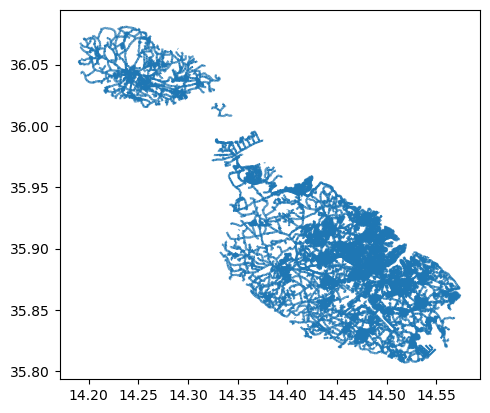

In [4]:
drive_net = osm.get_network(network_type="driving")
drive_net.plot()